                                                          ELECTRICITY PRICE PREDICTION

In [129]:
import pandas as pd
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\datasets\Electricity.csv")
df

C:\Users\HP\AppData\Local\Temp\ipykernel_28120\2012498012.py:2: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\datasets\Electricity.csv")


,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01-11-2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6,9.3,600.71,356,3159.6,54.32
1,01-11-2011 00:30,NaN,0,1,44,1,11,2011,1,321.8,3196.66,49.26,6,11.1,605.42,317,2973.01,54.23
2,01-11-2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.1,5,11.1,589.97,311,2834,54.23
3,01-11-2011 01:30,NaN,0,1,44,1,11,2011,3,335.6,2945.56,48.04,6,9.3,585.94,313,2725.99,53.47
4,01-11-2011 02:00,NaN,0,1,44,1,11,2011,4,342.9,2849.34,33.75,6,11.1,571.52,346,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,31-12-2013 21:30,New Year's Eve,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6,22.2,285.31,812,3692.95,42.45
38010,31-12-2013 22:00,New Year's Eve,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5,24.1,278.31,852,3571.0,33.83
38011,31-12-2013 22:30,New Year's Eve,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4,20.4,280.91,962,3460.29,31.75
38012,31-12-2013 23:00,New Year's Eve,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5,14.8,302.46,950,3563.99,50.6


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [3]:
df.isnull().sum()

DateTime                      0
Holiday                   36478
HolidayFlag                   0
DayOfWeek                     0
WeekOfYear                    0
Day                           0
Month                         0
Year                          0
PeriodOfDay                   0
ForecastWindProduction        0
SystemLoadEA                  0
SMPEA                         0
ORKTemperature                0
ORKWindspeed                  0
CO2Intensity                  0
ActualWindProduction          0
SystemLoadEP2                 0
SMPEP2                        0
dtype: int64

In [4]:
df.columns

Index(['DateTime', 'Holiday', 'HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day',
       'Month', 'Year', 'PeriodOfDay', 'ForecastWindProduction',
       'SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed',
       'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2'],
      dtype='object')

In [5]:
df["DateTime"].value_counts()

DateTime
01-11-2011 00:00    1
11-04-2013 21:30    1
11-04-2013 22:30    1
11-04-2013 23:00    1
11-04-2013 23:30    1
                   ..
22-07-2012 00:30    1
22-07-2012 01:00    1
22-07-2012 01:30    1
22-07-2012 02:00    1
31-12-2013 23:30    1
Name: count, Length: 38014, dtype: int64

In [6]:
import numpy as np
df.replace("?",np.nan,inplace=True)

In [7]:
df.isnull().sum()

DateTime                      0
Holiday                   36478
HolidayFlag                   0
DayOfWeek                     0
WeekOfYear                    0
Day                           0
Month                         0
Year                          0
PeriodOfDay                   0
ForecastWindProduction        5
SystemLoadEA                  2
SMPEA                         2
ORKTemperature              295
ORKWindspeed                299
CO2Intensity                  7
ActualWindProduction          5
SystemLoadEP2                 2
SMPEP2                        2
dtype: int64

In [8]:
import numpy as np
df["Holiday"].replace(np.nan,"No holiday",inplace=True)

In [9]:
df["Holiday"].isnull().sum()

0

In [10]:
df["Holiday"].head(20)

0     No holiday
1     No holiday
2     No holiday
3     No holiday
4     No holiday
5     No holiday
6     No holiday
7     No holiday
8     No holiday
9     No holiday
10    No holiday
11    No holiday
12    No holiday
13    No holiday
14    No holiday
15    No holiday
16    No holiday
17    No holiday
18    No holiday
19    No holiday
Name: Holiday, dtype: object

In [11]:
df.dtypes

DateTime                  object
Holiday                   object
HolidayFlag                int64
DayOfWeek                  int64
WeekOfYear                 int64
Day                        int64
Month                      int64
Year                       int64
PeriodOfDay                int64
ForecastWindProduction    object
SystemLoadEA              object
SMPEA                     object
ORKTemperature            object
ORKWindspeed              object
CO2Intensity              object
ActualWindProduction      object
SystemLoadEP2             object
SMPEP2                    object
dtype: object

In [12]:
df.isnull().sum()

DateTime                    0
Holiday                     0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

In [13]:
df["ForecastWindProduction"]=df["ForecastWindProduction"].astype("float")
df["SystemLoadEA"]=df["SystemLoadEA"].astype("float")
df["SMPEA"]=df["SMPEA"].astype("float")
df["ORKTemperature"]=df["ORKTemperature"].astype("float")
df["ORKWindspeed"]=df["ORKWindspeed"].astype("float")
df["CO2Intensity"]=df["CO2Intensity"].astype("float")
df["ActualWindProduction"]=df["ActualWindProduction"].astype("float")
df["SystemLoadEP2"]=df["SystemLoadEP2"].astype("float")
df["SMPEP2"]=df["SMPEP2"].astype("float")

In [14]:
df["ForecastWindProduction"].replace(np.nan,df["ForecastWindProduction"].mean(),inplace=True)

In [15]:
df["ForecastWindProduction"].isnull().sum()

0

In [16]:
df["SystemLoadEA"].replace(np.nan,df["SystemLoadEA"].mean(),inplace=True)

In [17]:
df["SystemLoadEA"].isnull().sum()

0

In [18]:
df["SMPEA"].replace(np.nan,df["SMPEA"].mean(),inplace=True)

In [19]:
df["SMPEA"].isnull().sum()

0

In [20]:
df["ORKTemperature"].replace(np.nan,df["ORKTemperature"].mean(),inplace=True)
df["ORKTemperature"].isnull().sum()

0

In [21]:
df["ORKWindspeed"].replace(np.nan,df["ORKWindspeed"].mean(),inplace=True)

In [22]:
df["ORKWindspeed"].isnull().sum()

0

In [23]:
df["CO2Intensity"].replace(np.nan,df["CO2Intensity"].mean(),inplace=True)

In [24]:
df["CO2Intensity"].isnull().sum()

0

In [25]:
df["ActualWindProduction"].replace(np.nan,df["ActualWindProduction"].mean(),inplace=True)

In [26]:
df["ActualWindProduction"].isnull().sum()

0

In [27]:
df["SystemLoadEP2"].replace(np.nan,df["SystemLoadEP2"].mean(),inplace=True)

In [28]:
df["SystemLoadEP2"].isnull().sum()

0

In [29]:
df["SMPEP2"].replace(np.nan,df["SMPEP2"].mean(),inplace=True)

In [30]:
df["SMPEP2"].isnull().sum()

0

In [31]:
df.dtypes

DateTime                   object
Holiday                    object
HolidayFlag                 int64
DayOfWeek                   int64
WeekOfYear                  int64
Day                         int64
Month                       int64
Year                        int64
PeriodOfDay                 int64
ForecastWindProduction    float64
SystemLoadEA              float64
SMPEA                     float64
ORKTemperature            float64
ORKWindspeed              float64
CO2Intensity              float64
ActualWindProduction      float64
SystemLoadEP2             float64
SMPEP2                    float64
dtype: object

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                38014 non-null  object 
 1   Holiday                 38014 non-null  object 
 2   HolidayFlag             38014 non-null  int64  
 3   DayOfWeek               38014 non-null  int64  
 4   WeekOfYear              38014 non-null  int64  
 5   Day                     38014 non-null  int64  
 6   Month                   38014 non-null  int64  
 7   Year                    38014 non-null  int64  
 8   PeriodOfDay             38014 non-null  int64  
 9   ForecastWindProduction  38014 non-null  float64
 10  SystemLoadEA            38014 non-null  float64
 11  SMPEA                   38014 non-null  float64
 12  ORKTemperature          38014 non-null  float64
 13  ORKWindspeed            38014 non-null  float64
 14  CO2Intensity            38014 non-null

In [33]:
df

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01-11-2011 00:00,No holiday,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,01-11-2011 00:30,No holiday,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,01-11-2011 01:00,No holiday,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,01-11-2011 01:30,No holiday,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,01-11-2011 02:00,No holiday,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,31-12-2013 21:30,New Year's Eve,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.0,22.2,285.31,812.0,3692.95,42.45
38010,31-12-2013 22:00,New Year's Eve,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.0,24.1,278.31,852.0,3571.00,33.83
38011,31-12-2013 22:30,New Year's Eve,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.0,20.4,280.91,962.0,3460.29,31.75
38012,31-12-2013 23:00,New Year's Eve,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.0,14.8,302.46,950.0,3563.99,50.60


In [34]:
df["SMPEA"]                #Forecasted price

0        49.26
1        49.26
2        49.10
3        48.04
4        33.75
         ...  
38009    34.51
38010    33.83
38011    31.75
38012    33.83
38013    33.83
Name: SMPEA, Length: 38014, dtype: float64

In [35]:
df["SMPEP2"]               #Actual price

0        54.32
1        54.23
2        54.23
3        53.47
4        39.87
         ...  
38009    42.45
38010    33.83
38011    31.75
38012    50.60
38013    34.90
Name: SMPEP2, Length: 38014, dtype: float64

In [36]:
df["SystemLoadEA"]        #forecasted national load

0        3388.77
1        3196.66
2        3060.71
3        2945.56
4        2849.34
          ...   
38009    3932.22
38010    3821.44
38011    3724.21
38012    3638.16
38013    3624.25
Name: SystemLoadEA, Length: 38014, dtype: float64

In [37]:
df["SystemLoadEP2"]     #actual national system load

0        3159.60
1        2973.01
2        2834.00
3        2725.99
4        2655.64
          ...   
38009    3692.95
38010    3571.00
38011    3460.29
38012    3563.99
38013    3517.08
Name: SystemLoadEP2, Length: 38014, dtype: float64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                38014 non-null  object 
 1   Holiday                 38014 non-null  object 
 2   HolidayFlag             38014 non-null  int64  
 3   DayOfWeek               38014 non-null  int64  
 4   WeekOfYear              38014 non-null  int64  
 5   Day                     38014 non-null  int64  
 6   Month                   38014 non-null  int64  
 7   Year                    38014 non-null  int64  
 8   PeriodOfDay             38014 non-null  int64  
 9   ForecastWindProduction  38014 non-null  float64
 10  SystemLoadEA            38014 non-null  float64
 11  SMPEA                   38014 non-null  float64
 12  ORKTemperature          38014 non-null  float64
 13  ORKWindspeed            38014 non-null  float64
 14  CO2Intensity            38014 non-null

In [39]:
df.rename(columns={"SMPEA":"Forecasted price", "SMPEP2":"Actual price"},inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                38014 non-null  object 
 1   Holiday                 38014 non-null  object 
 2   HolidayFlag             38014 non-null  int64  
 3   DayOfWeek               38014 non-null  int64  
 4   WeekOfYear              38014 non-null  int64  
 5   Day                     38014 non-null  int64  
 6   Month                   38014 non-null  int64  
 7   Year                    38014 non-null  int64  
 8   PeriodOfDay             38014 non-null  int64  
 9   ForecastWindProduction  38014 non-null  float64
 10  SystemLoadEA            38014 non-null  float64
 11  Forecasted price        38014 non-null  float64
 12  ORKTemperature          38014 non-null  float64
 13  ORKWindspeed            38014 non-null  float64
 14  CO2Intensity            38014 non-null

In [41]:
df

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,Forecasted price,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,Actual price
0,01-11-2011 00:00,No holiday,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,01-11-2011 00:30,No holiday,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,01-11-2011 01:00,No holiday,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,01-11-2011 01:30,No holiday,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,01-11-2011 02:00,No holiday,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,31-12-2013 21:30,New Year's Eve,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.0,22.2,285.31,812.0,3692.95,42.45
38010,31-12-2013 22:00,New Year's Eve,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.0,24.1,278.31,852.0,3571.00,33.83
38011,31-12-2013 22:30,New Year's Eve,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.0,20.4,280.91,962.0,3460.29,31.75
38012,31-12-2013 23:00,New Year's Eve,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.0,14.8,302.46,950.0,3563.99,50.60


In [42]:
df["Holiday"].value_counts()

Holiday
No holiday              36478
Christmas Eve             144
Christmas                 144
St Stephen's Day          144
New Year's Eve            144
New Year's Day             96
St Patrick's Day           96
Good Friday                96
Holy Saturday              96
Easter                     96
Easter Monday              96
May Day                    96
June Bank Holiday          96
August Bank Holiday        96
October Bank Holiday       96
Name: count, dtype: int64

In [43]:
df["HolidayFlag"].value_counts()

HolidayFlag
0    36478
1     1536
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_28120\1869539.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x=df["Holiday"],y=df["Actual price"],ci=False)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'No holiday'),
  Text(1, 0, 'Christmas Eve'),
  Text(2, 0, 'Christmas'),
  Text(3, 0, "St Stephen's Day"),
  Text(4, 0, "New Year's Eve"),
  Text(5, 0, "New Year's Day"),
  Text(6, 0, "St Patrick's Day"),
  Text(7, 0, 'Good Friday'),
  Text(8, 0, 'Holy Saturday'),
  Text(9, 0, 'Easter'),
  Text(10, 0, 'Easter Monday'),
  Text(11, 0, 'May Day'),
  Text(12, 0, 'June Bank Holiday'),
  Text(13, 0, 'August Bank Holiday'),
  Text(14, 0, 'October Bank Holiday')])

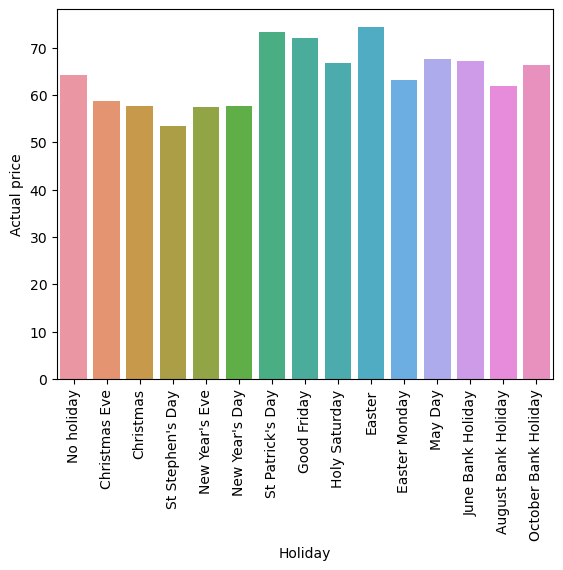

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=df["Holiday"],y=df["Actual price"],ci=False)
plt.xticks(rotation=90)

<Axes: xlabel='Forecasted price', ylabel='Actual price'>

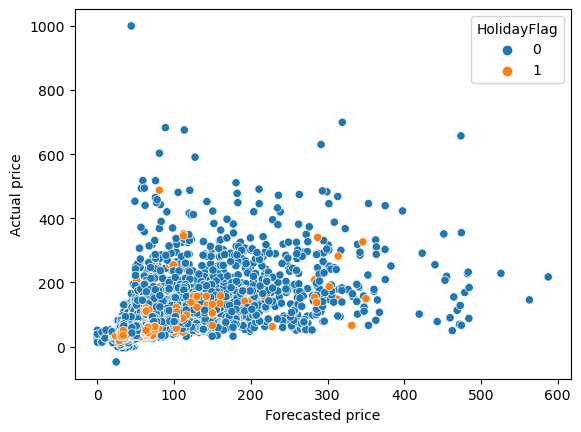

In [45]:
sns.scatterplot(x=df["Forecasted price"],y=df["Actual price"],hue=df["HolidayFlag"])

In [46]:
df["Year"].value_counts()

Year
2012    17566
2013    17520
2011     2928
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_28120\350209423.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x=df["Year"],y=df["Actual price"],ci=False)


(array([0, 1, 2]),
 [Text(0, 0, '2011'), Text(1, 0, '2012'), Text(2, 0, '2013')])

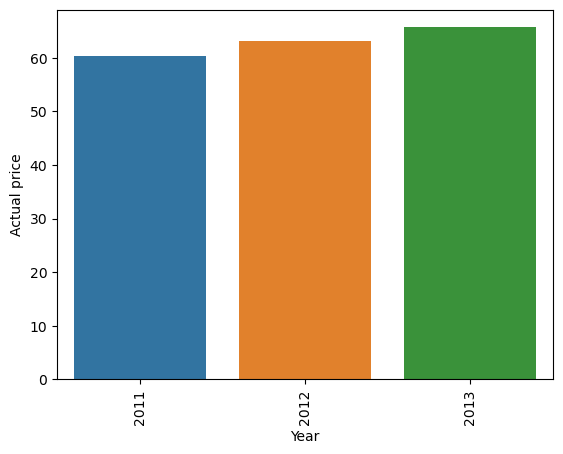

In [47]:
sns.barplot(x=df["Year"],y=df["Actual price"],ci=False)
plt.xticks(rotation=90)

In [48]:
df.columns

Index(['DateTime', 'Holiday', 'HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day',
       'Month', 'Year', 'PeriodOfDay', 'ForecastWindProduction',
       'SystemLoadEA', 'Forecasted price', 'ORKTemperature', 'ORKWindspeed',
       'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2',
       'Actual price'],
      dtype='object')

In [49]:
df[["ForecastWindProduction","Actual price"]].corr()               

,ForecastWindProduction,Actual price
ForecastWindProduction,1.000000,-0.080171
Actual price,-0.080171,1.000000


<Axes: xlabel='ForecastWindProduction', ylabel='Actual price'>

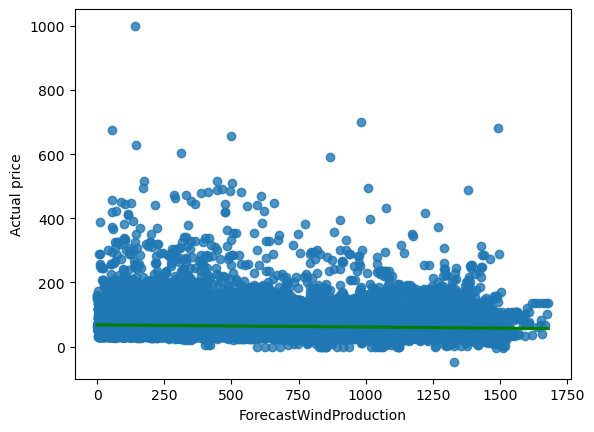

In [50]:
sns.regplot(x=df["ForecastWindProduction"],y=df["Actual price"],line_kws=dict(color="g"))

In [51]:
df[["SystemLoadEA","Actual price"]].corr()

,SystemLoadEA,Actual price
SystemLoadEA,1.000000,0.490802
Actual price,0.490802,1.000000


<Axes: xlabel='SystemLoadEA', ylabel='Actual price'>

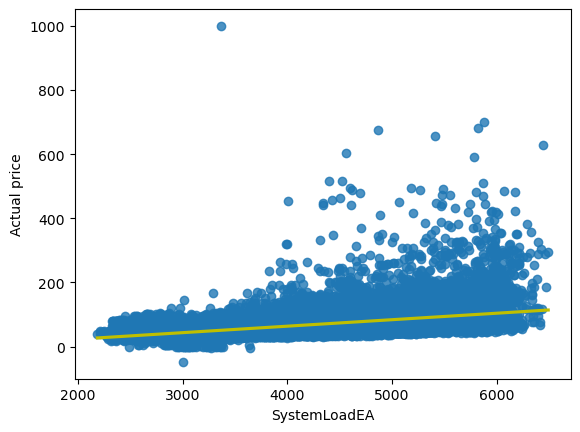

In [52]:
sns.regplot(x=df["SystemLoadEA"],y=df["Actual price"],line_kws=dict(color="y"))

In [53]:
df[["Forecasted price","Actual price"]].corr()

,Forecasted price,Actual price
Forecasted price,1.000000,0.617151
Actual price,0.617151,1.000000


<Axes: xlabel='Forecasted price', ylabel='Actual price'>

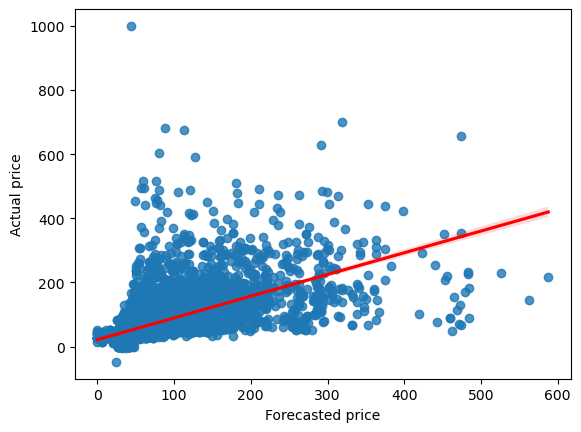

In [54]:
sns.regplot(x=df["Forecasted price"],y=df["Actual price"],line_kws=dict(color="r"))

In [55]:
df[["ORKTemperature","Actual price"]].corr()

,ORKTemperature,Actual price
ORKTemperature,1.000000,-0.008804
Actual price,-0.008804,1.000000


<Axes: xlabel='ORKTemperature', ylabel='Actual price'>

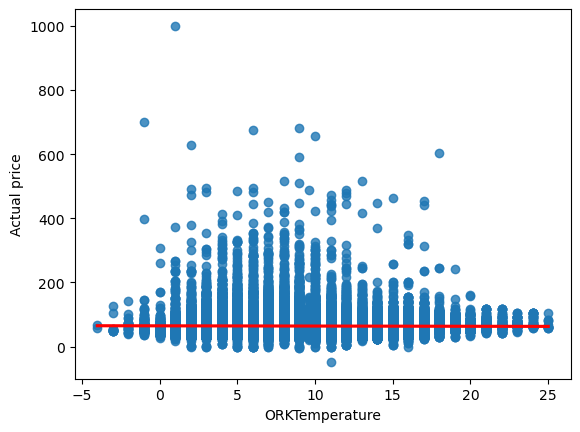

In [56]:
sns.regplot(x=df["ORKTemperature"],y=df["Actual price"],line_kws=dict(color="r"))

In [57]:
df[["ORKWindspeed","Actual price"]].corr()

,ORKWindspeed,Actual price
ORKWindspeed,1.000000,-0.035257
Actual price,-0.035257,1.000000


<Axes: xlabel='ORKWindspeed', ylabel='Actual price'>

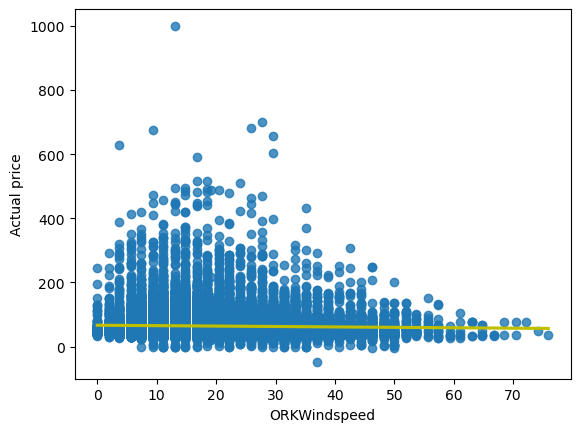

In [58]:
sns.regplot(x=df["ORKWindspeed"],y=df["Actual price"],line_kws=dict(color="y"))

In [59]:
df[["CO2Intensity","Actual price"]].corr()

,CO2Intensity,Actual price
CO2Intensity,1.000000,-0.033773
Actual price,-0.033773,1.000000


<Axes: xlabel='CO2Intensity', ylabel='Actual price'>

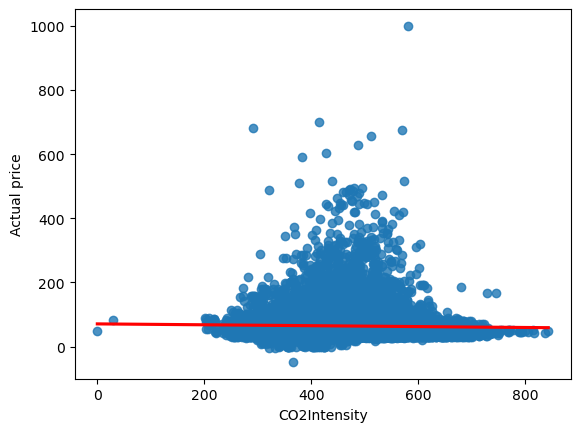

In [60]:
sns.regplot(x=df["CO2Intensity"],y=df["Actual price"],line_kws=dict(color="r"))

In [61]:
df[["ActualWindProduction","Actual price"]].corr()

,ActualWindProduction,Actual price
ActualWindProduction,1.000000,-0.083363
Actual price,-0.083363,1.000000


<Axes: xlabel='ActualWindProduction', ylabel='Actual price'>

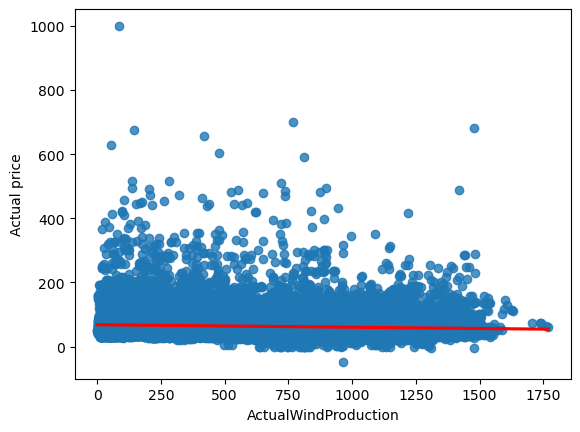

In [62]:
sns.regplot(x=df["ActualWindProduction"],y=df["Actual price"],line_kws=dict(color="r"))

In [63]:
df[["SystemLoadEP2","Actual price"]].corr()

,SystemLoadEP2,Actual price
SystemLoadEP2,1.000000,0.516825
Actual price,0.516825,1.000000


<Axes: xlabel='SystemLoadEP2', ylabel='Actual price'>

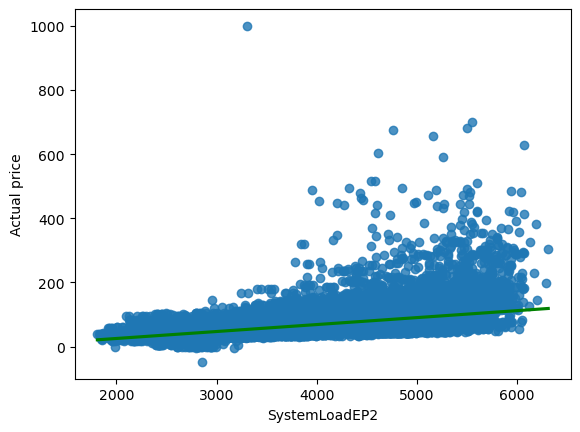

In [64]:
sns.regplot(x=df["SystemLoadEP2"],y=df["Actual price"],line_kws=dict(color="g"))

NORMALIZATION TECHNIQUES

In [65]:
df["Actualprice_feature"]=df["Actual price"]/df["Actual price"].max()           #simple feature scaling

In [66]:
df["Actualprice_feature"]

0        0.05432
1        0.05423
2        0.05423
3        0.05347
4        0.03987
          ...   
38009    0.04245
38010    0.03383
38011    0.03175
38012    0.05060
38013    0.03490
Name: Actualprice_feature, Length: 38014, dtype: float64

In [67]:
df["Actualprice_min_max"]=df["Actual price"]-df["Actual price"].min()/df["Actual price"].max()-df["Actual price"].min()   #min-max scaling

In [68]:
df["Actualprice_min_max"]

0        102.10774
1        102.01774
2        102.01774
3        101.25774
4         87.65774
           ...    
38009     90.23774
38010     81.61774
38011     79.53774
38012     98.38774
38013     82.68774
Name: Actualprice_min_max, Length: 38014, dtype: float64

In [69]:
df["Actualprice_zscore"]=df["Actual price"]-df["Actual price"].mean()/df["Actual price"].std()           #z-score normalization

In [70]:
df["Actualprice_zscore"]

0        52.508947
1        52.418947
2        52.418947
3        51.658947
4        38.058947
           ...    
38009    40.638947
38010    32.018947
38011    29.938947
38012    48.788947
38013    33.088947
Name: Actualprice_zscore, Length: 38014, dtype: float64

In [71]:
df[["Actual price","Actualprice_feature","Actualprice_min_max","Actualprice_zscore"]]

,Actual price,Actualprice_feature,Actualprice_min_max,Actualprice_zscore
0,54.32,0.05432,102.10774,52.508947
1,54.23,0.05423,102.01774,52.418947
2,54.23,0.05423,102.01774,52.418947
3,53.47,0.05347,101.25774,51.658947
4,39.87,0.03987,87.65774,38.058947
...,...,...,...,...
38009,42.45,0.04245,90.23774,40.638947
38010,33.83,0.03383,81.61774,32.018947
38011,31.75,0.03175,79.53774,29.938947
38012,50.60,0.05060,98.38774,48.788947


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                38014 non-null  object 
 1   Holiday                 38014 non-null  object 
 2   HolidayFlag             38014 non-null  int64  
 3   DayOfWeek               38014 non-null  int64  
 4   WeekOfYear              38014 non-null  int64  
 5   Day                     38014 non-null  int64  
 6   Month                   38014 non-null  int64  
 7   Year                    38014 non-null  int64  
 8   PeriodOfDay             38014 non-null  int64  
 9   ForecastWindProduction  38014 non-null  float64
 10  SystemLoadEA            38014 non-null  float64
 11  Forecasted price        38014 non-null  float64
 12  ORKTemperature          38014 non-null  float64
 13  ORKWindspeed            38014 non-null  float64
 14  CO2Intensity            38014 non-null

In [73]:
df[["Actualprice_feature","Actual price"]].corr()

,Actualprice_feature,Actual price
Actualprice_feature,1.0,1.0
Actual price,1.0,1.0


In [74]:
 X=df[["HolidayFlag","DayOfWeek","WeekOfYear","Day","Month","Year","PeriodOfDay","ForecastWindProduction","SystemLoadEA","Forecasted price","ORKTemperature","ORKWindspeed","CO2Intensity","ActualWindProduction","SystemLoadEP2"]]

In [75]:
Y=df["Actual price"]

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [77]:
X_train.shape

(30411, 15)

In [78]:
X_test.shape

(7603, 15)

In [79]:
Y_train.shape

(30411,)

In [80]:
Y_test.shape

(7603,)

In [81]:
import numpy as np
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
Y_train=np.asarray(Y_train)
Y_test=np.asarray(Y_test)

In [82]:
from sklearn import linear_model

In [83]:
model=linear_model.LinearRegression()

In [84]:
model.fit(X_train,Y_train)

LinearRegression()

In [85]:
Y_pred=model.predict(X_test)

In [86]:
Y_pred[:5]

array([ 92.32362051,  47.75923034,  35.50925658,  64.64642068,
       104.73703326])

In [87]:
Y_test[:5]

array([142.87,  40.79,  38.45,  48.06,  97.15])

In [88]:
from sklearn import metrics
print("Mean absolute error:" , metrics.mean_absolute_error(Y_test,Y_pred))       #Mean Absolute Error

Mean absolute error: 14.229753894717694


In [89]:
print("Mean squared error:", metrics.mean_squared_error(Y_test,Y_pred))          #Mean Squared Error

Mean squared error: 641.7054647526808


In [90]:
print("R-squared error:", metrics.r2_score(Y_test,Y_pred))                       #R-Squared Error

R-squared error: 0.4507054777902344


In [91]:
from sklearn import linear_model
clf=linear_model.Lasso()

In [92]:
clf.fit(X_train,Y_train)

Lasso()

In [93]:
y_pred=clf.predict(X_test)

In [94]:
y_pred[:5]

array([ 92.31522199,  46.5489433 ,  36.86399795,  65.52630364,
       103.18963871])

In [95]:
Y_test[:5]

array([142.87,  40.79,  38.45,  48.06,  97.15])

In [96]:
from sklearn import metrics
print("Mean absolute error:" , metrics.mean_absolute_error(Y_test,y_pred))       #Mean Absolute Error

Mean absolute error: 14.227584567240987


In [97]:
print("Mean squared error:", metrics.mean_squared_error(Y_test,y_pred))          #Mean Squared Error

Mean squared error: 643.6671508909379


In [98]:
print("R-squared error:", metrics.r2_score(Y_test,y_pred))                       #R-Squared Error

R-squared error: 0.44902629082794987


In [99]:
from sklearn import tree

In [100]:
vk=tree.DecisionTreeRegressor()

In [101]:
vk.fit(X_train,Y_train)

DecisionTreeRegressor()

In [102]:
pred=vk.predict(X_test)

In [103]:
print("Mean absolute error:" , metrics.mean_absolute_error(Y_test,pred))       #Mean Absolute Error

Mean absolute error: 10.628935946336973


In [104]:
print("Mean squared error:", metrics.mean_squared_error(Y_test,pred))          #Mean Squared Error

Mean squared error: 873.4137328949099


In [105]:
print("R-squared error:", metrics.r2_score(Y_test,pred))                       #R-Squared Error

R-squared error: 0.25236513407773165


In [106]:
from sklearn import ensemble

In [107]:
tk=ensemble.RandomForestRegressor()

In [108]:
tk.fit(X_train,Y_train)

RandomForestRegressor()

In [109]:
predi=tk.predict(X_test)

In [110]:
print("Mean absolute error:" , metrics.mean_absolute_error(Y_test,predi))       #Mean Absolute Error

Mean absolute error: 8.565315215089043


In [111]:
print("Mean squared error:", metrics.mean_squared_error(Y_test,predi))          #Mean Squared Error

Mean squared error: 414.5270803106957


In [112]:
print("R-squared error:", metrics.r2_score(Y_test,predi))                       #R-Squared Error

R-squared error: 0.6451682788613473


In [113]:
st=ensemble.RandomForestRegressor(n_estimators=500)

In [114]:
st.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=500)

In [115]:
predic=st.predict(X_test)

In [116]:
print("Mean absolute erro r:" , metrics.mean_absolute_error(Y_test,predic))       #Mean Absolute Error

Mean absolute error: 8.425136595728254


In [117]:
print("Mean squared error:", metrics.mean_squared_error(Y_test,predic))          #Mean Squared Error

Mean squared error: 404.9533616932184


In [118]:
print("R-squared error:", metrics.r2_score(Y_test,predic))                       #R-Squared Error

R-squared error: 0.6533633020964771


In [119]:
from sklearn.decomposition import PCA

In [120]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

In [121]:
X_pca

array([[ -908.25173546,  -223.12382917],
       [-1177.06923818,  -225.91611881],
       [-1370.70868606,  -209.07816395],
       ...,
       [ -385.43995072,   765.12357381],
       [ -376.98958502,   710.60599584],
       [ -417.53642822,   741.09509138]])

In [122]:
X_pca.shape

(38014, 2)

In [123]:
pc1=X_pca[:,0]
pc2=X_pca[:,1]

In [124]:
pc1[:200]

array([ -908.25173546, -1177.06923818, -1370.70868606, -1527.65672084,
       -1643.3319087 , -1719.98359655, -1758.03089633, -1782.66382791,
       -1776.07465891, -1763.42267336, -1713.50652164, -1618.93284869,
       -1375.43480768, -1005.84224045,  -562.36389659,  -161.23097188,
         230.59764417,   509.23978093,   777.67938575,   934.88081471,
        1009.67278498,  1061.59849431,  1122.34590767,  1145.57556677,
        1197.45422252,  1231.99137313,  1168.00852811,  1051.96020851,
        1066.83326628,  1070.73669156,  1115.64421406,  1194.64976942,
        1315.89921589,  1630.82256675,  2178.28878877,  2504.64924246,
        2410.60528402,  2174.52739569,  1921.40985398,  1687.82467884,
        1424.45372981,  1214.66809972,  1000.28485594,   663.14594419,
         349.25646178,    25.47765623,  -201.92530652,  -457.48443259,
        -816.93403295, -1106.74306985, -1312.70920232, -1463.91033666,
       -1607.44560432, -1678.97865005, -1729.56392634, -1747.76806898,
      

In [125]:
pc2[:200]

array([-223.12382917, -225.91611881, -209.07816395, -191.7810356 ,
       -157.796448  , -150.40490445, -150.4291382 , -146.51120692,
       -140.72643527, -144.84299479, -125.4695676 , -140.73960738,
       -153.4679174 , -197.62586832, -198.81219272, -232.61253787,
       -269.07643029, -285.46309264, -268.5846228 , -249.07220537,
       -219.40858083, -171.47363177, -100.72039743,  -31.22939406,
         72.29135996,  186.61174566,  270.53735067,  326.18029278,
        393.90347773,  443.48965684,  489.82023378,  555.46759745,
        565.78203291,  621.00483424,  693.05461557,  750.43482616,
        853.53563735,  942.29493768, 1009.82478444, 1090.77683793,
       1120.92763111, 1119.55875387, 1154.48981001, 1179.03107074,
       1236.53570865, 1297.10884339, 1182.45131999, 1207.47761566,
       1227.89452096, 1185.37857888, 1095.97991911, 1027.13483023,
        958.24342909,  913.82039127,  861.36929616,  857.73442349,
        862.02229626,  840.47850179,  844.21488894,  812.36851

<Axes: >

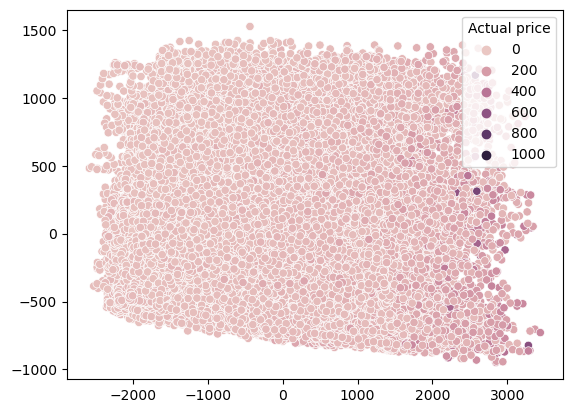

In [126]:
import seaborn as sns
sns.scatterplot(x=pc1,y=pc2,hue=df["Actual price"])

In [127]:
variance_ratio=pca.explained_variance_ratio_
total_variance = variance_ratio.sum()

In [128]:
print("variance ratio:" ,variance_ratio)
print(f"Total variance ratio:{total_variance:.4f}")

variance ratio: [0.80987659 0.17661765]
Total variance ratio:0.9865
